<a href="https://colab.research.google.com/github/nishantkapps/aiml-projects/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import os
from keras import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.python.ops.gen_batch_ops import batch

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/FB-stock-prices.csv')

In [ ]:
df.head()

,Date,Price
0,1/4/2021,269
1,1/5/2021,271
2,1/6/2021,263
3,1/7/2021,269
4,1/8/2021,268


In [ ]:
df.dtypes

Date     object
Price     int64
dtype: object

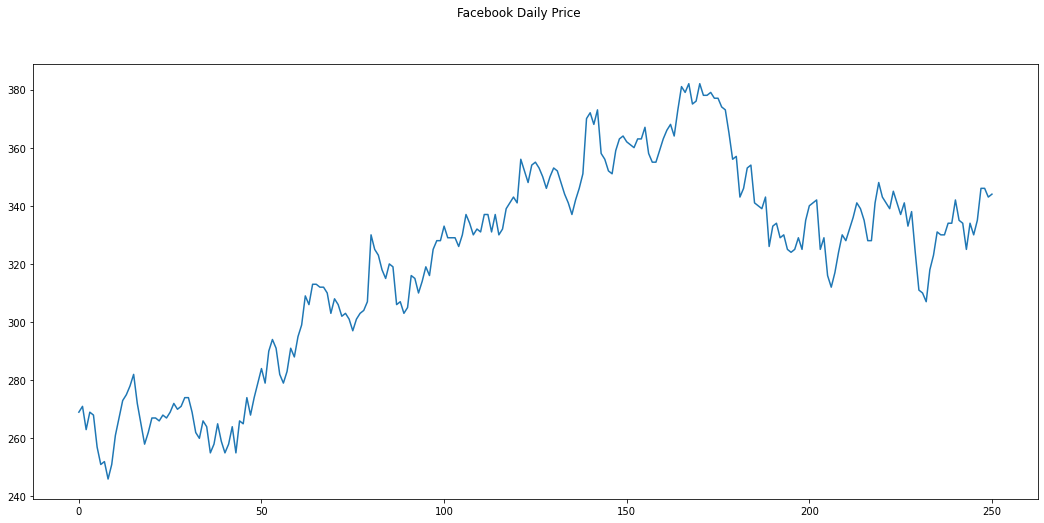

In [ ]:
plt.figure(figsize=(18,8)).suptitle('Facebook Daily Price')
plt.plot(df['Price'])

In [ ]:
std = StandardScaler()
price_scaled = std.fit_transform(df[['Price']].values)

In [ ]:
length_of_data = price_scaled.size
print(length_of_data)

251


In [ ]:
train_price = price_scaled[0:201,:]
test_price = price_scaled[201:,:]

In [ ]:
train_price[0:(0+5),0]

array([-1.49673154, -1.4393189 , -1.66896946, -1.49673154, -1.52543786])

In [ ]:
train_price[1:(1+5),0]

array([-1.4393189 , -1.66896946, -1.49673154, -1.52543786, -1.84120738])

In [ ]:
train_price[1+5,0]

-2.013445307923758

In [ ]:
def create_data(data, no_of_previous_inputs):
  x=[]
  y=[]
  for i in range(len(data)-no_of_previous_inputs-1):
     x.append(data[i:(i+no_of_previous_inputs),0])
     y.append(data[(i+no_of_previous_inputs),0])
     # print(i)

  return np.array(x),np.array(y)

In [ ]:
no_of_prev_inputs = 20
x_train, y_train = create_data(train_price,no_of_prev_inputs)

In [ ]:
x_train.shape

(180, 20)

In [ ]:
len(y_train)

180

In [ ]:
x_train = np.reshape(x_train,
           (x_train.shape[0],1, x_train.shape[1]))

In [ ]:
x_train.shape

(180, 1, 20)

In [ ]:
y_train.shape

(180,)

In [ ]:
# Build the RNN model
tf.random.set_seed(5)
rnn=Sequential()
rnn.add(SimpleRNN(16,input_shape=(1,no_of_prev_inputs)))
rnn.add(Dense(1))
rnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 16)                592       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rnn.compile(optimizer='adam',loss='mean_squared_error', metrics=['mse'])

In [ ]:
rnn.fit(x_train, y_train, epochs=10, batch_size=1)

Epoch 1/10
180/180 [==============================] - 1s 2ms/step - loss: 0.1777 - mse: 0.1777
Epoch 2/10
180/180 [==============================] - 0s 2ms/step - loss: 0.0628 - mse: 0.0628
Epoch 3/10
180/180 [==============================] - 0s 2ms/step - loss: 0.0450 - mse: 0.0450
Epoch 4/10
180/180 [==============================] - 0s 2ms/step - loss: 0.0376 - mse: 0.0376
Epoch 5/10
180/180 [==============================] - 0s 2ms/step - loss: 0.0377 - mse: 0.0377
Epoch 6/10
180/180 [==============================] - 0s 2ms/step - loss: 0.0327 - mse: 0.0327
Epoch 7/10
180/180 [==============================] - 0s 2ms/step - loss: 0.0333 - mse: 0.0333
Epoch 8/10
180/180 [==============================] - 0s 2ms/step - loss: 0.0312 - mse: 0.0312
Epoch 9/10
180/180 [==============================] - 0s 2ms/step - loss: 0.0313 - mse: 0.0313
Epoch 10/10
180/180 [==============================] - 0s 2ms/step - loss: 0.0329 - mse: 0.0329


In [ ]:
x_test, y_test = create_data(train_price,no_of_prev_inputs)

In [ ]:
x_test.shape

(180, 20)

In [ ]:
x_test = np.reshape(x_test,
           (x_test.shape[0],1, x_test.shape[1]))

In [ ]:
x_test.shape

(180, 1, 20)

In [ ]:
rnn.evaluate(x_test,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.0263 - mse: 0.0263


[0.026332564651966095, 0.026332564651966095]

In [ ]:
pred_test = rnn.predict(x_test)
pred = std.inverse_transform(pred_test)

In [ ]:
pred_test.shape

(180, 1)

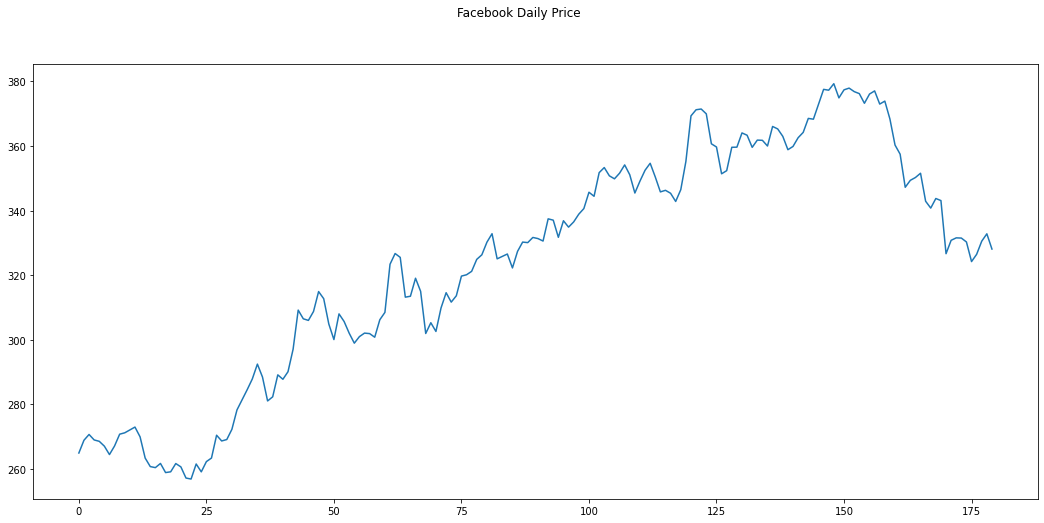

In [ ]:
plt.figure(figsize=(18,8)).suptitle('Facebook Daily Price')
plt.plot(pred)